In [1]:
import scipy.io as sio
import numpy as np
import random

import matplotlib.pyplot as plt


In [2]:
bdats = sio.loadmat('/home/garrett/work/AmitM_wts/benchmark_for_garrett.mat')
# sha256sum
# 672e674846643a9972bc7fffcbf33701554574fa10be7017206724ea50632d8b

In [3]:
bdats.keys()

dict_keys(['__header__', '__version__', '__globals__', 'L', 'amplitudes', 'angles', 'coords', 'covar', 'dmap_coords', 'down_L', 'down_vols', 'ims', 'mean_vol', 'num_cov_coords', 'r', 'recon_idxes', 'recon_vols', 'rots', 'shifts', 'states', 'vols', 'vols_wt_est'])

In [4]:
bdats['vols_wt_est'].shape  # this is output what we want to compare

(54, 54, 54, 16)

In [5]:
bdats['dmap_coords'].shape # weight

(16, 10000)

In [6]:
bdats['ims'].shape # out input, projection images

(54, 54, 10000)

In [7]:
from aspire.basis import FBBasis3D, FFBBasis3D
from aspire.image import Image
from aspire.operators import RadialCTFFilter
from aspire.reconstruction import WeightedVolumesEstimator
from aspire.source import Simulation
from aspire.source import ArrayImageSource



In [8]:
# PARAMS
N = bdats['ims'].shape[-1] # number of images (Matlab order)
DTYPE=np.float64
R = bdats['r'][0][0]  # 16  # the number of spectral volumes estimated
L = bdats['ims'].shape[0]  # Volume Resolution (Matlab order)

In [9]:


src = ArrayImageSource(Image(np.transpose(bdats['ims'],(2,0,1))))
src.rots = np.transpose(bdats['rots'], (2,0,1))

fbasis = FFBBasis3D((L, L, L), dtype=DTYPE)
basis = FBBasis3D((L, L, L), dtype=DTYPE)
print('basis generated')

weights = bdats['dmap_coords'].T # Transpose from matlab order



2021-07-08 12:28:49,152 INFO Expanding 3D map in a frequency-domain Fourier–Bessel basis using the fast method.
2021-07-08 12:28:49,872 INFO Expanding 3D map in a spatial-domain Fourier–Bessel basis using the direct method.
basis generated


In [10]:
# This takes a very long time.... confirmed once, skipped since.
#estimator = WeightedVolumesEstimator(
#    weights, src, basis, preconditioner="none"
#)
#est = estimator.estimate()

In [11]:
# should be okay
festimator = WeightedVolumesEstimator(
    weights, src, fbasis, preconditioner="none"
)


In [12]:
fest = festimator.estimate()

2021-07-08 12:35:25,963 INFO Loading images from cache
2021-07-08 12:35:25,966 INFO Applying forward transformations in pipeline
2021-07-08 12:35:25,966 INFO All forward transformations applied
2021-07-08 12:35:25,967 INFO Loaded 512 images
2021-07-08 12:35:26,312 INFO Trying NFFT backend finufft
2021-07-08 12:35:26,315 INFO NFFT backend finufft usable.
2021-07-08 12:35:26,315 INFO Trying NFFT backend cufinufft
2021-07-08 12:35:26,317 INFO NFFT backend cufinufft not usable:
	No module named 'pycuda'
2021-07-08 12:35:26,317 INFO Trying NFFT backend pynfft
2021-07-08 12:35:26,318 INFO NFFT backend pynfft not usable:
	No module named 'pynfft'
2021-07-08 12:35:26,318 INFO Selected NFFT backend = finufft.
2021-07-08 12:35:26,676 INFO Loading images from cache
2021-07-08 12:35:26,679 INFO Applying forward transformations in pipeline
2021-07-08 12:35:26,680 INFO All forward transformations applied
2021-07-08 12:35:26,680 INFO Loaded 512 images
2021-07-08 12:35:27,286 INFO Loading images from 

2021-07-08 12:35:45,237 INFO Applying forward transformations in pipeline
2021-07-08 12:35:45,238 INFO All forward transformations applied
2021-07-08 12:35:45,238 INFO Loaded 512 images
2021-07-08 12:35:45,847 INFO Loading images from cache
2021-07-08 12:35:45,850 INFO Applying forward transformations in pipeline
2021-07-08 12:35:45,851 INFO All forward transformations applied
2021-07-08 12:35:45,851 INFO Loaded 512 images
2021-07-08 12:35:46,452 INFO Loading images from cache
2021-07-08 12:35:46,455 INFO Applying forward transformations in pipeline
2021-07-08 12:35:46,456 INFO All forward transformations applied
2021-07-08 12:35:46,456 INFO Loaded 512 images
2021-07-08 12:35:47,056 INFO Loading images from cache
2021-07-08 12:35:47,059 INFO Applying forward transformations in pipeline
2021-07-08 12:35:47,059 INFO All forward transformations applied
2021-07-08 12:35:47,060 INFO Loaded 512 images
2021-07-08 12:35:47,658 INFO Loading images from cache
2021-07-08 12:35:47,660 INFO Applyin

2021-07-08 12:36:05,232 INFO Applying forward transformations in pipeline
2021-07-08 12:36:05,232 INFO All forward transformations applied
2021-07-08 12:36:05,233 INFO Loaded 512 images
2021-07-08 12:36:05,830 INFO Loading images from cache
2021-07-08 12:36:05,833 INFO Applying forward transformations in pipeline
2021-07-08 12:36:05,834 INFO All forward transformations applied
2021-07-08 12:36:05,835 INFO Loaded 512 images
2021-07-08 12:36:06,431 INFO Loading images from cache
2021-07-08 12:36:06,433 INFO Applying forward transformations in pipeline
2021-07-08 12:36:06,434 INFO All forward transformations applied
2021-07-08 12:36:06,435 INFO Loaded 512 images
2021-07-08 12:36:07,038 INFO Loading images from cache
2021-07-08 12:36:07,041 INFO Applying forward transformations in pipeline
2021-07-08 12:36:07,042 INFO All forward transformations applied
2021-07-08 12:36:07,042 INFO Loaded 512 images
2021-07-08 12:36:07,647 INFO Loading images from cache
2021-07-08 12:36:07,649 INFO Applyin

2021-07-08 12:36:25,805 INFO Applying forward transformations in pipeline
2021-07-08 12:36:25,805 INFO All forward transformations applied
2021-07-08 12:36:25,806 INFO Loaded 512 images
2021-07-08 12:36:26,408 INFO Loading images from cache
2021-07-08 12:36:26,411 INFO Applying forward transformations in pipeline
2021-07-08 12:36:26,411 INFO All forward transformations applied
2021-07-08 12:36:26,412 INFO Loaded 512 images
2021-07-08 12:36:27,012 INFO Loading images from cache
2021-07-08 12:36:27,014 INFO Applying forward transformations in pipeline
2021-07-08 12:36:27,015 INFO All forward transformations applied
2021-07-08 12:36:27,016 INFO Loaded 512 images
2021-07-08 12:36:27,617 INFO Loading images from cache
2021-07-08 12:36:27,620 INFO Applying forward transformations in pipeline
2021-07-08 12:36:27,620 INFO All forward transformations applied
2021-07-08 12:36:27,621 INFO Loaded 512 images
2021-07-08 12:36:28,224 INFO Loading images from cache
2021-07-08 12:36:28,227 INFO Applyin

2021-07-08 12:36:46,108 INFO Applying forward transformations in pipeline
2021-07-08 12:36:46,109 INFO All forward transformations applied
2021-07-08 12:36:46,109 INFO Loaded 512 images
2021-07-08 12:36:46,712 INFO Loading images from cache
2021-07-08 12:36:46,715 INFO Applying forward transformations in pipeline
2021-07-08 12:36:46,716 INFO All forward transformations applied
2021-07-08 12:36:46,716 INFO Loaded 512 images
2021-07-08 12:36:47,318 INFO Loading images from cache
2021-07-08 12:36:47,320 INFO Applying forward transformations in pipeline
2021-07-08 12:36:47,321 INFO All forward transformations applied
2021-07-08 12:36:47,322 INFO Loaded 512 images
2021-07-08 12:36:47,919 INFO Loading images from cache
2021-07-08 12:36:47,921 INFO Applying forward transformations in pipeline
2021-07-08 12:36:47,922 INFO All forward transformations applied
2021-07-08 12:36:47,922 INFO Loaded 512 images
2021-07-08 12:36:48,525 INFO Loading images from cache
2021-07-08 12:36:48,528 INFO Applyin

2021-07-08 12:37:06,065 INFO Applying forward transformations in pipeline
2021-07-08 12:37:06,066 INFO All forward transformations applied
2021-07-08 12:37:06,066 INFO Loaded 512 images
2021-07-08 12:37:06,664 INFO Loading images from cache
2021-07-08 12:37:06,667 INFO Applying forward transformations in pipeline
2021-07-08 12:37:06,668 INFO All forward transformations applied
2021-07-08 12:37:06,668 INFO Loaded 512 images
2021-07-08 12:37:07,265 INFO Loading images from cache
2021-07-08 12:37:07,267 INFO Applying forward transformations in pipeline
2021-07-08 12:37:07,268 INFO All forward transformations applied
2021-07-08 12:37:07,269 INFO Loaded 512 images
2021-07-08 12:37:07,875 INFO Loading images from cache
2021-07-08 12:37:07,877 INFO Applying forward transformations in pipeline
2021-07-08 12:37:07,878 INFO All forward transformations applied
2021-07-08 12:37:07,879 INFO Loaded 512 images
2021-07-08 12:37:08,480 INFO Loading images from cache
2021-07-08 12:37:08,483 INFO Applyin

2021-07-08 12:37:26,129 INFO Applying forward transformations in pipeline
2021-07-08 12:37:26,130 INFO All forward transformations applied
2021-07-08 12:37:26,130 INFO Loaded 512 images
2021-07-08 12:37:26,725 INFO Loading images from cache
2021-07-08 12:37:26,728 INFO Applying forward transformations in pipeline
2021-07-08 12:37:26,729 INFO All forward transformations applied
2021-07-08 12:37:26,729 INFO Loaded 512 images
2021-07-08 12:37:27,328 INFO Loading images from cache
2021-07-08 12:37:27,331 INFO Applying forward transformations in pipeline
2021-07-08 12:37:27,332 INFO All forward transformations applied
2021-07-08 12:37:27,332 INFO Loaded 512 images
2021-07-08 12:37:27,932 INFO Loading images from cache
2021-07-08 12:37:27,935 INFO Applying forward transformations in pipeline
2021-07-08 12:37:27,935 INFO All forward transformations applied
2021-07-08 12:37:27,936 INFO Loaded 512 images
2021-07-08 12:37:28,536 INFO Loading images from cache
2021-07-08 12:37:28,539 INFO Applyin

2021-07-08 12:37:46,414 INFO Applying forward transformations in pipeline
2021-07-08 12:37:46,414 INFO All forward transformations applied
2021-07-08 12:37:46,415 INFO Loaded 512 images
2021-07-08 12:37:47,016 INFO Loading images from cache
2021-07-08 12:37:47,019 INFO Applying forward transformations in pipeline
2021-07-08 12:37:47,019 INFO All forward transformations applied
2021-07-08 12:37:47,020 INFO Loaded 512 images
2021-07-08 12:37:47,623 INFO Loading images from cache
2021-07-08 12:37:47,625 INFO Applying forward transformations in pipeline
2021-07-08 12:37:47,626 INFO All forward transformations applied
2021-07-08 12:37:47,627 INFO Loaded 512 images
2021-07-08 12:37:48,224 INFO Loading images from cache
2021-07-08 12:37:48,226 INFO Applying forward transformations in pipeline
2021-07-08 12:37:48,226 INFO All forward transformations applied
2021-07-08 12:37:48,227 INFO Loaded 272 images
2021-07-08 12:37:48,541 INFO Loading images from cache
2021-07-08 12:37:48,544 INFO Applyin

2021-07-08 12:38:06,385 INFO Applying forward transformations in pipeline
2021-07-08 12:38:06,386 INFO All forward transformations applied
2021-07-08 12:38:06,387 INFO Loaded 512 images
2021-07-08 12:38:06,985 INFO Loading images from cache
2021-07-08 12:38:06,988 INFO Applying forward transformations in pipeline
2021-07-08 12:38:06,988 INFO All forward transformations applied
2021-07-08 12:38:06,989 INFO Loaded 512 images
2021-07-08 12:38:07,592 INFO Loading images from cache
2021-07-08 12:38:07,595 INFO Applying forward transformations in pipeline
2021-07-08 12:38:07,596 INFO All forward transformations applied
2021-07-08 12:38:07,596 INFO Loaded 512 images
2021-07-08 12:38:08,197 INFO Loading images from cache
2021-07-08 12:38:08,199 INFO Applying forward transformations in pipeline
2021-07-08 12:38:08,200 INFO All forward transformations applied
2021-07-08 12:38:08,201 INFO Loaded 512 images
2021-07-08 12:38:08,806 INFO Loading images from cache
2021-07-08 12:38:08,808 INFO Applyin

2021-07-08 12:38:26,440 INFO Applying forward transformations in pipeline
2021-07-08 12:38:26,441 INFO All forward transformations applied
2021-07-08 12:38:26,441 INFO Loaded 512 images
2021-07-08 12:38:27,039 INFO Loading images from cache
2021-07-08 12:38:27,042 INFO Applying forward transformations in pipeline
2021-07-08 12:38:27,043 INFO All forward transformations applied
2021-07-08 12:38:27,043 INFO Loaded 512 images
2021-07-08 12:38:27,644 INFO Loading images from cache
2021-07-08 12:38:27,647 INFO Applying forward transformations in pipeline
2021-07-08 12:38:27,647 INFO All forward transformations applied
2021-07-08 12:38:27,648 INFO Loaded 512 images
2021-07-08 12:38:28,257 INFO Loading images from cache
2021-07-08 12:38:28,260 INFO Applying forward transformations in pipeline
2021-07-08 12:38:28,261 INFO All forward transformations applied
2021-07-08 12:38:28,261 INFO Loaded 512 images
2021-07-08 12:38:28,864 INFO Loading images from cache
2021-07-08 12:38:28,867 INFO Applyin

In [13]:
fest.shape


(16, 54, 54, 54)

In [14]:
#np.sqrt(np.mean(np.square(fest - est))) # only if computed slow `est` above

In [15]:
# comparable voxel average, but different sign convention for density
print(np.mean(bdats['vols_wt_est'][:,:,:,0]))
print(np.mean(bdats['vols'][:,:,:,0]))

-0.26754123
0.2685839021864145


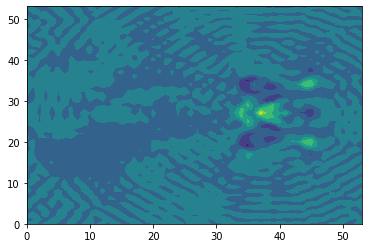

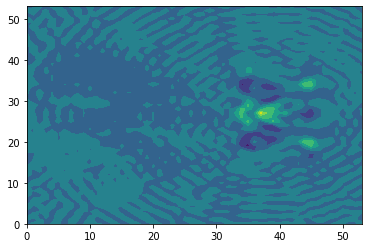

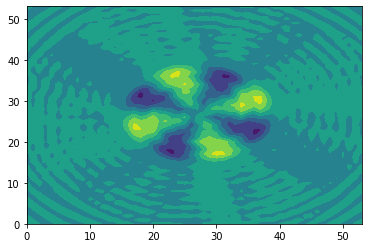

In [16]:
test_img = 1

v0 = bdats['vols_wt_est'][:,:,:,test_img]
for axis in range(3):
    plt.contourf(np.arange(L),np.arange(L), np.sum(v0, axis=axis))
    plt.show()


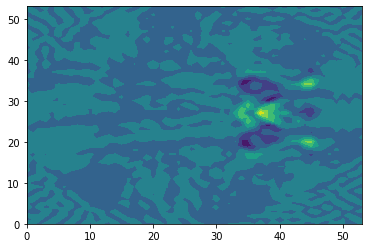

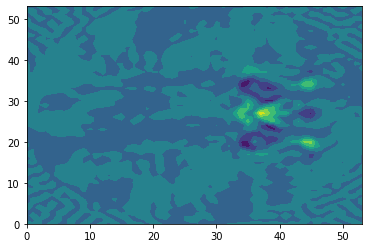

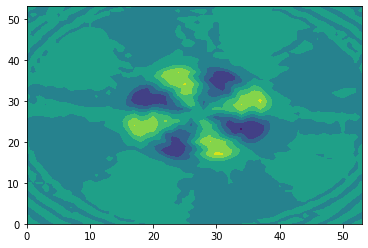

In [17]:

for axis in range(3):
    plt.contourf(np.arange(L),np.arange(L), np.sum(fest[test_img], axis=axis))
    plt.show()


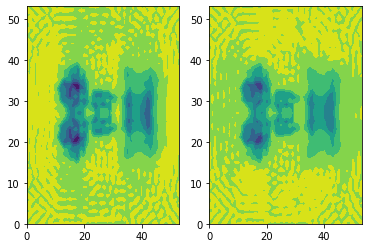

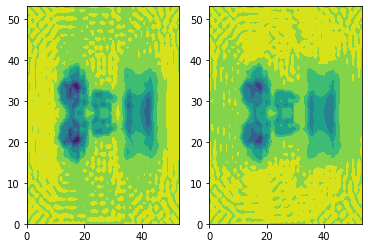

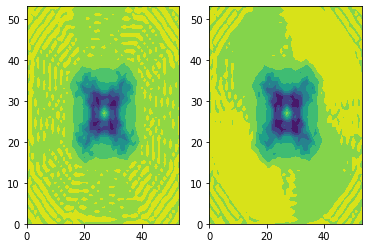

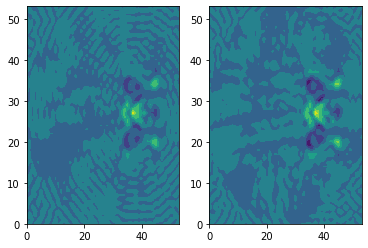

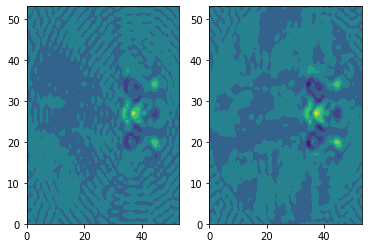

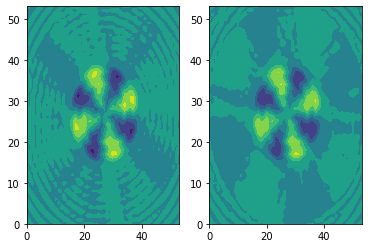

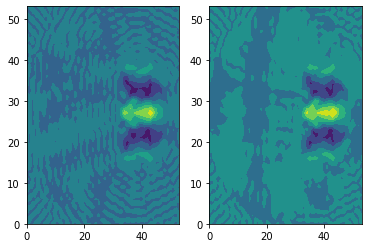

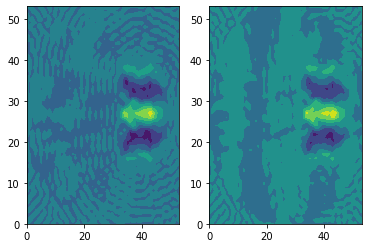

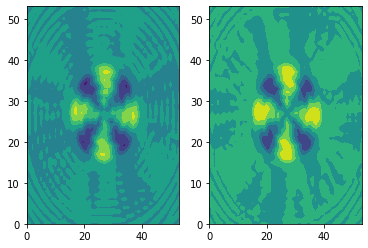

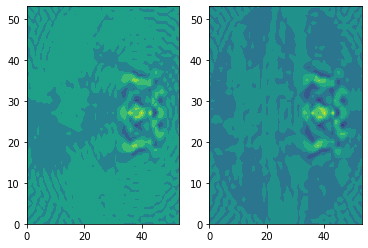

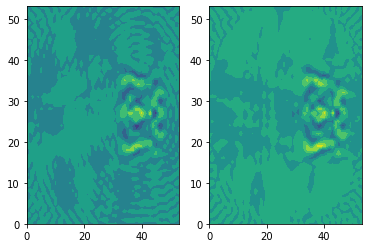

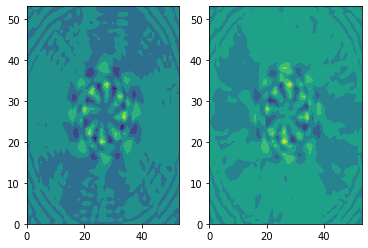

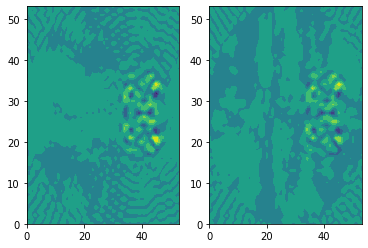

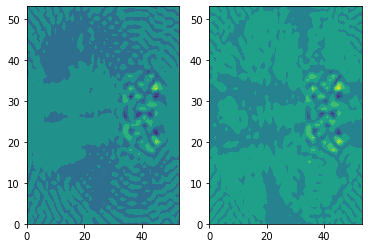

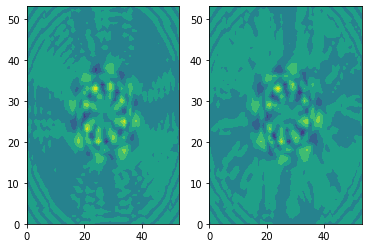

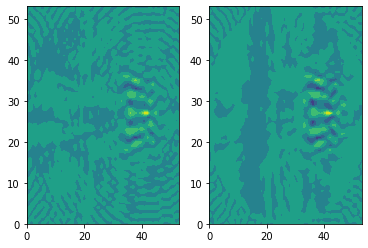

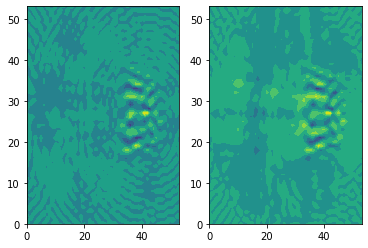

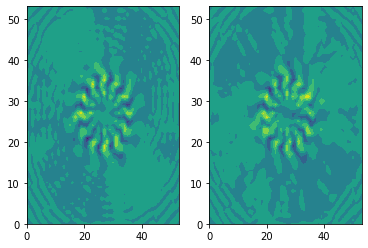

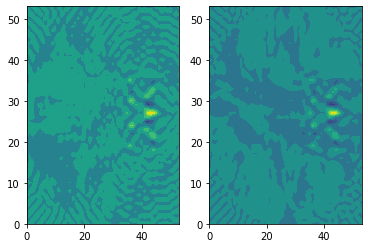

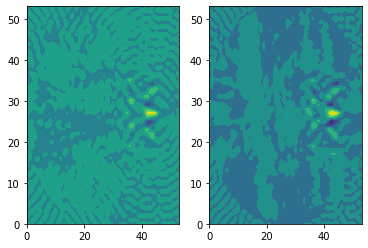

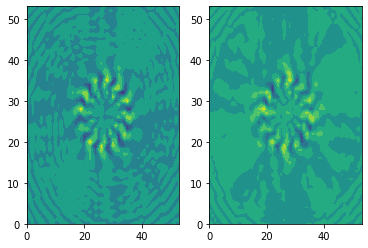

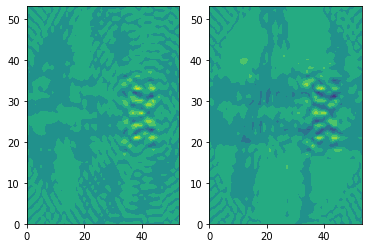

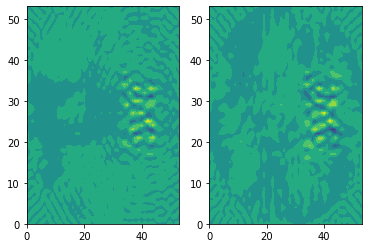

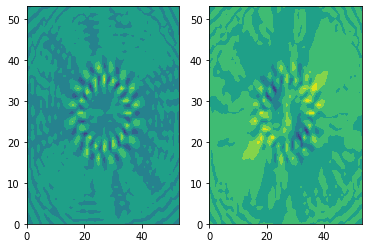

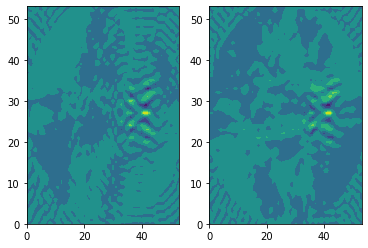

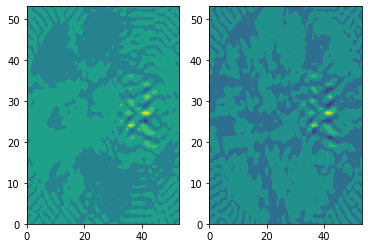

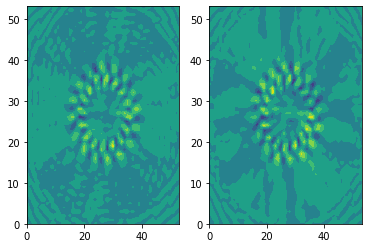

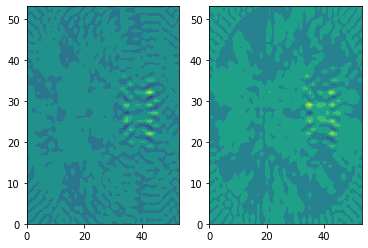

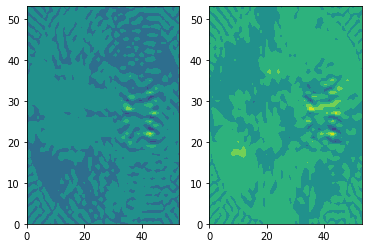

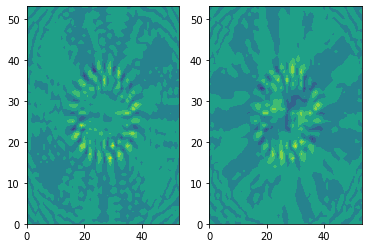

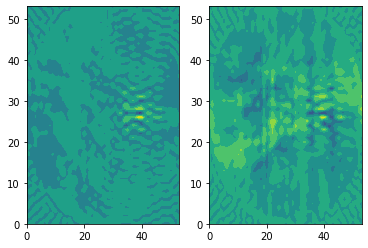

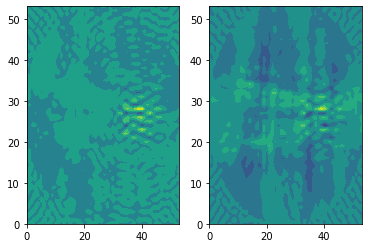

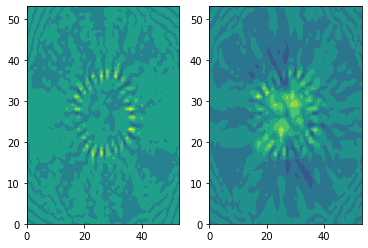

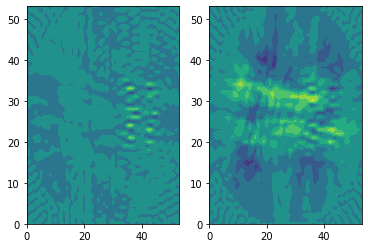

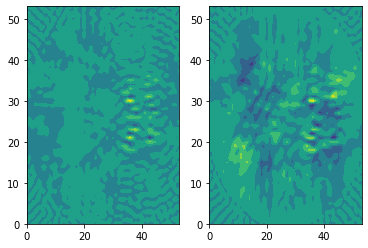

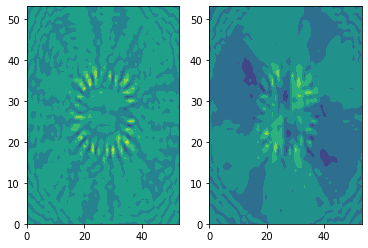

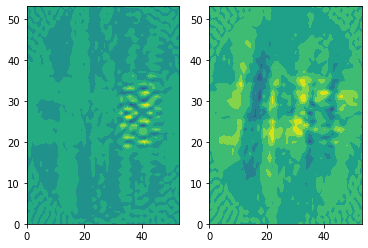

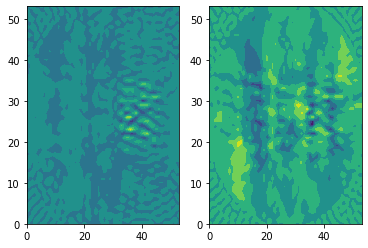

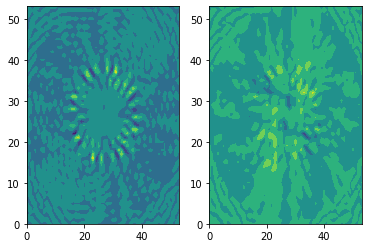

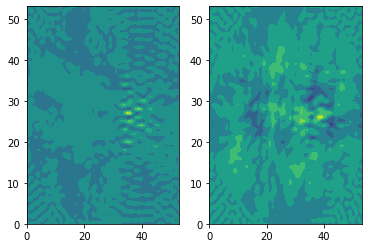

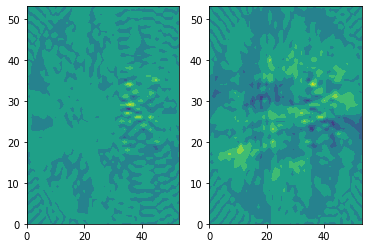

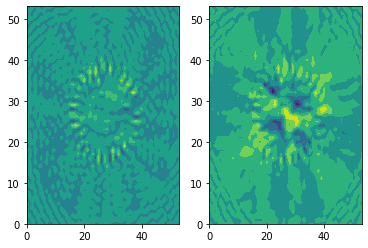

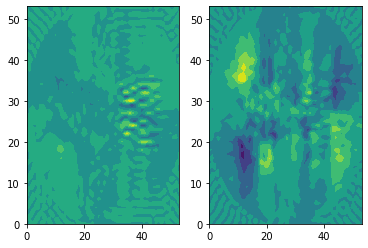

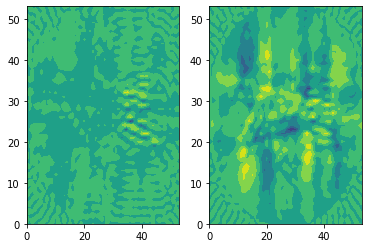

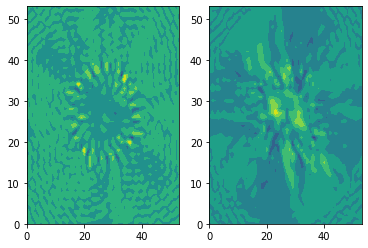

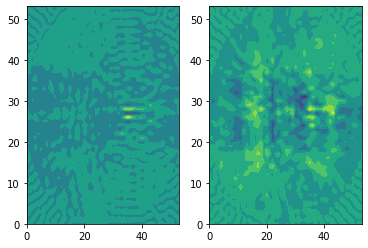

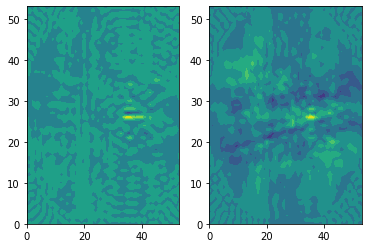

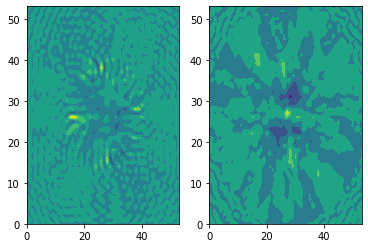

In [18]:
# compare all, left is MATLAB workspace, right is ASPIRE-Python implementation
for i in range(16):
    for axis in range(3):
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.contourf(np.arange(L),np.arange(L), np.sum(bdats['vols_wt_est'][:,:,:,i], axis=axis))

        ax2.contourf(np.arange(L),np.arange(L), np.sum(fest[i], axis=axis))
        plt.show()    
    